In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import re
import os

In [2]:
def is_chinese(uchar):         
    if u'\u4e00' <= uchar<=u'\u9fff':
        return True
    else:
        return False

In [3]:
def one_word(word):
    if len(word)==1:
        return True
    else:
        return False

In [4]:
currentPath = os.getcwd()
# print(currentPath)
data = open(currentPath+"/tecoDisclosure.txt", "r", encoding="utf-8")
data = data.read()

In [5]:
regex = re.compile(r'[\n\r\t]')
data = regex.sub(" ", data)
data.replace(" ","")
# data

'-113-東元電機股份有限公司個體財務報表附註民國106年度及105年度單位：新台幣仟元(除特別註明者外)一、公司沿革東元電機股份有限公司(以下簡稱「本公司」)於民國45年6月12日依公司法設立。主要經營之業務為：各種機械設備、冷凍空調設備、發電、輸電、配電機械、電器及視聽電子產品、有線及無線通信機械器材之產銷、承裝等業務。本公司於民國92年與台安電機股份有限公司合併，本公司為存續公司，台安電機股份有限公司為消滅公司。另本公司於民國100年與安陽電機股份有限公司及東台科技股份有限公司合併，本公司為存續公司，安陽電機股份有限公司及東台科技股份有限公司為消滅公司。二、通過財務報告之日期及程序本個體財務報告已於民國107年3月26日經董事會通過發布。三、新發布及修訂準則及解釋之適用(一)已採用金融監督管理委員會(以下簡稱「金管會」)認可之新發布、修正後國際財務報導準則之影響下表彙列金管會認可之民國106年適用之國際財務報導準則之新發布、修正及修訂之準則及解釋：新發布/修正/修訂準則及解釋國際會計準則理事會發布之生效日國際財務報導準則第10號、第12號及國際會計準則第28號之修正「投資個體：適用合併報表之例外規定」民國105年1月1日國際財務報導準則第11號之修正「取得聯合營運權益之會計處理」民國105年1月1日國際財務報導準則第14號「管制遞延帳戶」民國105年1月1日國際會計準則第1號之修正「揭露倡議」民國105年1月1日國際會計準則第16號及第38號之修正「可接受之折舊及攤銷方法之闡釋」民國105年1月1日國際會計準則第16號及第41號之修正「農業：生產性植物」民國105年1月1日國際會計準則第19號之修正「確定福利計畫：員工提撥金」民國103年7月1日國際會計準則第27號之修正「單獨財務報表之權益法」民國105年1月1日國際會計準則第36號之修正「非金融資產可回收金額之揭露」民國103年1月1日國際會計準則第39號之修正「衍生工具之約務更替與避險會計之持續適用」民國103年1月1日國際財務報導解釋第21號「公課」民國103年1月1日2010-2012週期之年度改善民國103年7月1日-114-本公司經評估上述準則及解釋對本公司財務狀況與財務績效並無重大影響。(二)尚未採用金管會認可之新發布、修正後國際財務報導準則之影響下表彙列金管會認可之民國107年適用之國際財務

In [6]:
seg_list = jieba.cut(data, cut_all=False)  # 精确模式
# print("Default Mode: " + "/ ".join(seg_list))  

In [7]:
new_data=""
for d in data:
    if is_chinese(d):
        new_data+=d

In [8]:
stopwords = ["集團","收入","成本","費用","工具","國際","合約","財務報導","取得",
             "股份","有限公司","年度","公司","企業","準則","民國","包含","第號","可能","解釋","支付","當現","其他","綜合","資產","負債"]

puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

addword = ["或有負債","不動產廠房及設備","馬達","無形資產","新台幣","附註","視聽","合併","東元電機","股份有限公司","財務報表","國際","國際會計準則","仟元","資產","理事會","國外營運機構","財務","所得稅","銀行",
           "績效","貨幣","表達","項目","融資","評估","財務報告","業務","生產性植物","其他","遞延","帳戶","聯合營運","揭露","財務報導","確定福利計畫","可回收金額","損益","收入","費用","客戶","合約","營運","融資",
           "換算","機構","公允價值","可靠","衡量","折現","攤銷後成本","避險會計","公司債","淨變現價值","決定","製成品","重大","設立","公司治理","租賃","承租人","歸屬","編製","負債","合併報表","備供出售","金融",
           "透過","其他","綜合","發佈","修正","機械","民國","關係人","轉投資","實收資本額","企業"]

delword = ["董致","致型","致","致致","災致","校董","董校","日月","災型","董災","災災","型型","董型","致校","校型","校致","外本","致災","綜合損","衡之融","非動","權法","及其","日止"]

for w in addword:
    jieba.add_word(w, freq=None, tag=None)
for w in delword:
    jieba.del_word(w)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/jr/jp2dd4ss0tbft8nd60g_4v7h0000gn/T/jieba.cache
Loading model cost 0.918 seconds.
Prefix dict has been built succesfully.


In [9]:
seg_list = jieba.cut(new_data, cut_all=False)
seg_list = list(seg_list)
print(seg_list)
oneWord = []
for word in seg_list:
    if one_word(word) and (word not in oneWord):
        oneWord.append(word)
print(oneWord)

['東元電機', '股份有限公司', '個體', '財務報表', '附註', '民國', '及', '單位', '新台幣', '仟元', '除特', '別', '註', '明', '者', '外', '一', '公司', '沿革', '東元電機', '股份有限公司', '以下', '簡稱', '本', '公司', '於', '民國', '月', '日', '依', '公司法', '設', '主要', '經營', '之', '業務', '為', '各種', '機械', '設備', '凍空調', '設備', '發電輸', '電配電', '機械', '電器', '及', '視聽', '電子', '產品', '有線', '及', '無線', '通信', '機械', '器材', '之產銷', '承裝', '等', '業務', '本', '公司', '於', '民國', '與', '台安', '電機', '股份有限公司', '合併', '本', '公司', '為', '存續', '公司', '台安', '電機', '股份有限公司', '為', '消滅', '公司', '另本', '公司', '於', '民國', '與', '安陽', '電機', '股份有限公司', '及', '東台', '科技股份', '有限公司', '合併', '本', '公司', '為', '存續', '公司', '安陽', '電機', '股份有限公司', '及', '東台', '科技股份', '有限公司', '為', '消滅', '公司', '二通', '過', '財務報告', '之', '日期', '及', '程序', '本個體', '財務報告', '已', '於', '民國', '月', '日經', '董事', '會', '通過', '發布', '三新', '發布及', '修訂', '準則', '及', '解釋', '之', '適用', '一', '已', '採用融', '監督', '管委', '員會', '以下', '簡稱', '管會', '認可', '之', '新', '發布', '修正', '後', '國際', '財務報導', '準則', '之', '影響', '下表', '彙', '管會', '認可', '之', '民國', '適用', '之', '國際', '財務報導', '準則', '之'

In [10]:
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs) and (w not in oneWord):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten

[('公允價值', 112),
 ('所得稅', 76),
 ('重大', 54),
 ('影響', 49),
 ('子公司', 48),
 ('投資', 45),
 ('財務', 44),
 ('借款', 44),
 ('工程', 42),
 ('退休', 40),
 ('減損', 38),
 ('損失', 38),
 ('相關', 38),
 ('新台幣', 37),
 ('採用', 37),
 ('如下', 37),
 ('認為', 37),
 ('風險', 36),
 ('當期', 36),
 ('修正', 35),
 ('項目', 34),
 ('設備', 33),
 ('部分', 32),
 ('關係人', 32),
 ('國際會計準則', 31),
 ('透過', 31),
 ('估計', 31),
 ('持有', 31),
 ('遞延', 30),
 ('分別', 30),
 ('東元', 30),
 ('衍生', 29),
 ('評估', 29),
 ('評價', 29),
 ('控制', 28),
 ('變動', 28),
 ('到期', 27),
 ('發生', 26),
 ('貨幣', 26),
 ('股份有限公司', 25),
 ('市場', 25),
 ('應付', 25),
 ('確定', 24),
 ('損按', 24),
 ('所有', 24),
 ('資訊', 24),
 ('信用', 23),
 ('商品', 23),
 ('表日', 22),
 ('期間', 22),
 ('客戶', 22),
 ('調整', 22),
 ('原始', 22),
 ('適用', 21),
 ('規定', 21),
 ('營運', 21),
 ('財務報告', 20),
 ('包括', 20),
 ('備供出售', 20),
 ('租賃', 20),
 ('政策', 20),
 ('本期', 20),
 ('主要', 19),
 ('帳款', 19),
 ('預期', 18),
 ('應收', 18),
 ('營業', 18),
 ('分配', 18),
 ('截至', 18),
 ('使用', 17),
 ('決定', 17),
 ('計畫', 17),
 ('價值', 17),
 ('收取', 17),
 ('個體', 16),
 ('附註'

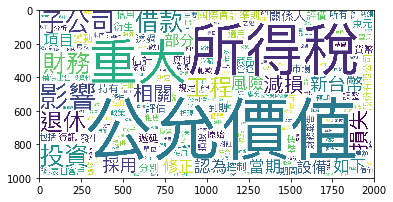

In [11]:
font = "/System/Library/Fonts/PingFang.ttc"
wordcloud = WordCloud(background_color="white",width=2000, height=1000, margin=2,font_path=font)
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)
wordcloud.to_file('week4_wordcloud.png')

In [12]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])


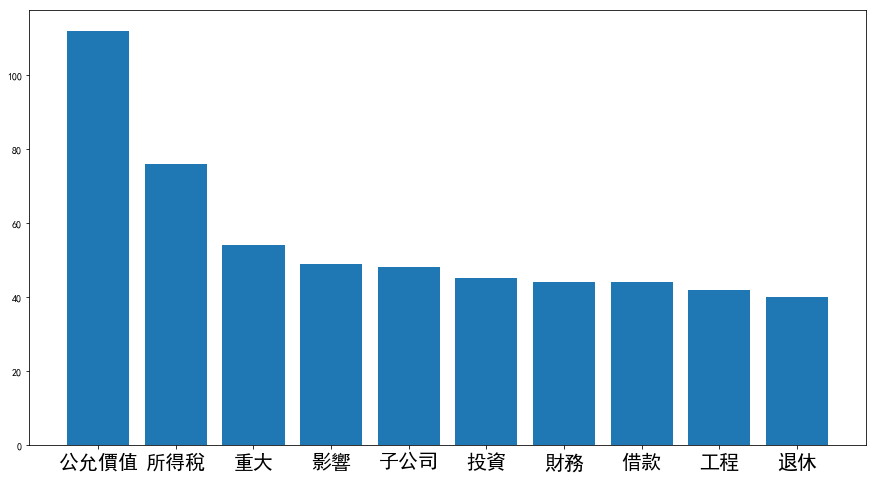

In [13]:
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.figure(figsize=(15,8))
plt.bar(range(0,10),data)
plt.xticks(range(0,10),label,fontsize=20)
plt.savefig("week4_plt.png")